# PHYS 3116 SAMI

In [23]:
# import libraries
from math import log10, floor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colours
from astropy.io import ascii, fits
from astropy.table import Table, join
from scipy.odr import *

In [24]:
# read in all data files.
InputCatGAMADR3 = pd.read_csv('InputCatGAMADR3.csv')
samiDR3InputCatClusters = pd.read_csv('samiDR3InputCatClusters.csv')
samiDR3StelKin = pd.read_csv('samiDR3StelKin.csv')
samiDR3VisualMorphology = pd.read_csv('samiDR3VisualMorphology.csv')

In [25]:
# small check
InputCatGAMADR3.head(5)

,Unnamed: 0,catid,ra_obj,dec_obj,ra_ifu,dec_ifu,r_petro,r_auto,z_tonry,z_spec,...,mu_within_1re,mu_1re,mu_2re,ellip,pa,mstar,g_i,a_g,surv_sami,bad_class
0,0,40873,183.439765,-0.833229,183.439765,-0.833229,19.491,16.869,0.05234,0.05110,...,NaN,NaN,NaN,NaN,NaN,9.81,0.76,0.082,3,3
1,1,48805,218.621562,-0.798935,218.621562,-0.798935,19.507,17.607,0.03735,0.03654,...,NaN,NaN,NaN,NaN,NaN,8.92,0.39,0.149,3,3
2,2,196977,133.590423,-0.707572,133.590423,-0.707572,17.149,17.130,0.05055,0.04949,...,NaN,NaN,NaN,NaN,NaN,9.96,1.13,0.092,3,0
3,3,215293,133.536926,0.498455,133.536926,0.498455,19.755,15.062,0.02944,0.02842,...,NaN,NaN,NaN,NaN,NaN,10.10,0.84,0.184,8,3
4,4,323508,132.033380,1.564864,132.033380,1.564864,19.154,18.930,0.04058,0.03956,...,NaN,NaN,NaN,NaN,NaN,8.70,0.63,0.134,3,3


In [26]:
# import the data
kin_fits = fits.open('sami_stellarkin.fits')
kin_data = kin_fits[1].data # kinematics data
data_ellipticity = kin_data['ELLIP']
data_vsigma = kin_data['VSIGMA_RE']
data_age = kin_data['LW_AGE_RE']

# theoretical curve
ellipticity = np.linspace(0.01, 0.9, 1000) # 1000 points between 0.01 and 0.7
vsigma = (((0.09+0.1*ellipticity)*ellipticity)/(1-ellipticity))**0.5 # calculate theoretical v/sigma

# limit data to the same ellipticity range and remove nans
mask = ((data_ellipticity > 0.01) &
        (data_ellipticity < 0.9) &
        (~np.isnan(data_ellipticity)) &
        (~np.isnan(data_vsigma)) &
        (~np.isnan(data_age)))

sami_ellipticity = data_ellipticity[mask]
sami_vsigma = data_vsigma[mask]
sami_age = data_age[mask]

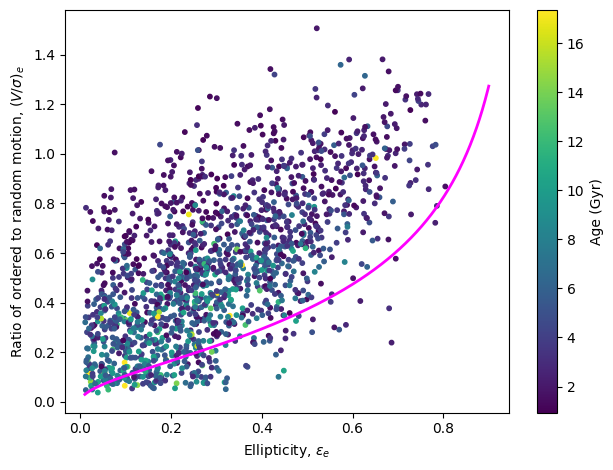

In [27]:
# Plot the theoretical line
plt.scatter(sami_ellipticity, sami_vsigma, s=10, c=sami_age)
plt.plot(ellipticity,vsigma, color='magenta', linewidth=2)
plt.xlabel('Ellipticity, $\\varepsilon_e$')
plt.ylabel('Ratio of ordered to random motion, $(V/\\sigma)_e$')
plt.colorbar(label='Age (Gyr)')           
plt.tight_layout()
plt.show()